In [2]:
import numpy as np
from scipy.stats import rice
import matplotlib.pyplot as plt

In [3]:
# parameters
B = 5 * 1e6  # [hz]
C = 3e8  # [m/s]
F = 3 * 1e9  # [hz]
K = 13.55         # [db]


AWGN_DBM = -95
AWGN_W = 10 ** (AWGN_DBM / 10) / 1000


In [4]:
# variable

SAMPLE = 1000

d = np.linspace(10, 200000, SAMPLE)  # [m]
p_tx = 1  # [watt]
# plt.plot(d)

In [5]:
pl_unitless = (C / (4 * np.pi * F * d)) ** 2

rician_fading_w = 10 ** (rice.rvs(K, size=SAMPLE) / 10)

rss_w = p_tx * pl_unitless * rician_fading_w
# print(rician_fading_w)
snr_unitless = rss_w / AWGN_W
print(snr_unitless)
dr_bps = B * np.log2(1 + snr_unitless)

#dr_mbps = dr_bps / 2 ** 20
dr_mbps = dr_bps /1e6

[3.84441542e+07 1.28640146e+05 3.38035745e+04 1.25775250e+04
 5.04708463e+03 2.76397605e+03 4.37867601e+03 2.28780373e+03
 1.43050728e+03 1.08311498e+03 9.78309001e+02 8.64002927e+02
 1.06733872e+03 7.72663486e+02 4.87384274e+02 3.21357799e+02
 5.28555378e+02 4.95350270e+02 6.31658974e+02 3.02161561e+02
 2.62388333e+02 2.29489286e+02 1.90160244e+02 2.72216613e+02
 1.87451953e+02 2.51340088e+02 1.59424452e+02 1.43776021e+02
 9.46583057e+01 1.67993811e+02 2.04335893e+02 1.13488604e+02
 7.99377468e+01 8.10944222e+01 7.09795091e+01 8.04269891e+01
 7.91891983e+01 7.38921846e+01 8.01801398e+01 6.70159741e+01
 7.89712464e+01 7.55688859e+01 7.54758692e+01 1.01563173e+02
 4.17235186e+01 7.00822587e+01 4.52056296e+01 6.04529639e+01
 3.87851812e+01 4.41760801e+01 5.93325071e+01 5.65793156e+01
 3.93587550e+01 3.69320782e+01 4.48968153e+01 3.41781899e+01
 3.18757446e+01 1.96533351e+01 2.41208008e+01 3.24219390e+01
 3.35248526e+01 3.41477990e+01 2.32907681e+01 4.08862148e+01
 2.43825700e+01 2.272533

In [6]:
pl_unitless_1 = (C / (4 * np.pi * F * 1000)) ** 2
pl_unitless_2 = (C / (4 * np.pi * F * 20000)) ** 2
#rician_fading_w = 10 ** (rice.rvs(K, size=SAMPLE) / 10)

rss_w1 = p_tx * pl_unitless_1
rss_w2 = p_tx * pl_unitless_2

snr_unitless1 = rss_w1 / AWGN_W
snr_unitless2 = rss_w2 / AWGN_W

dr_bps1 = B * np.log2(1 + snr_unitless1)
dr_bps2 = B * np.log2(1 + snr_unitless2)

#dr_mbps = dr_bps / 2 ** 20
dr_mbps1 = dr_bps1 /1e6
dr_mbps2 = dr_bps2 /1e6
print(dr_mbps1)
print(dr_mbps2)

38.26435290381971
2.927860420995642


In [7]:
snr_unitless = p_tx * pl_unitless / AWGN_W
snr_unitless

array([2.00253572e+06, 4.53268340e+03, 1.18906910e+03, 5.37166026e+02,
       3.04645543e+02, 1.95938646e+02, 1.36518264e+02, 1.00536163e+02,
       7.71095294e+01, 6.10101494e+01, 4.94728204e+01, 4.09236032e+01,
       3.44131175e+01, 2.93411293e+01, 2.53130791e+01, 2.20609611e+01,
       1.93975636e+01, 1.71889101e+01, 1.53370757e+01, 1.37691425e+01,
       1.24299102e+01, 1.12769706e+01, 1.02773080e+01, 9.40490944e+00,
       8.63905506e+00, 7.96307625e+00, 7.36344108e+00, 6.82907172e+00,
       6.35082912e+00, 5.92111961e+00, 5.53359166e+00, 5.18289974e+00,
       4.86451904e+00, 4.57459876e+00, 4.30984515e+00, 4.06742750e+00,
       3.84490217e+00, 3.64015081e+00, 3.45132971e+00, 3.27682816e+00,
       3.11523402e+00, 2.96530500e+00, 2.82594476e+00, 2.69618280e+00,
       2.57515752e+00, 2.46210184e+00, 2.35633110e+00, 2.25723257e+00,
       2.16425666e+00, 2.07690918e+00, 1.99474483e+00, 1.91736150e+00,
       1.84439532e+00, 1.77551640e+00, 1.71042507e+00, 1.64884864e+00,
      

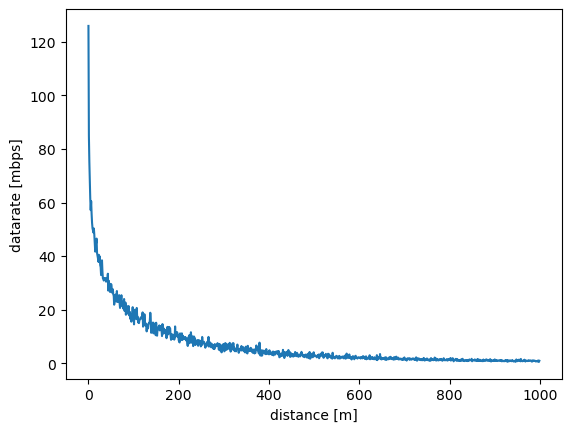

In [8]:
plt.plot(dr_mbps)
plt.xlabel("distance [m]")
plt.ylabel("datarate [mbps]")
plt.savefig("Fadding.pdf")